In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

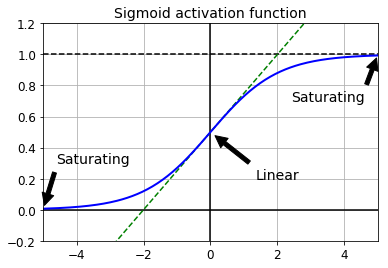

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2, mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [8]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [12]:
hisory = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 70us/sample - loss: 1.2806 - accuracy: 0.6250 - val_loss: 0.8883 - val_accuracy: 0.7152
Epoch 2/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.7954 - accuracy: 0.7373 - val_loss: 0.7135 - val_accuracy: 0.7648
Epoch 3/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.6816 - accuracy: 0.7727 - val_loss: 0.6356 - val_accuracy: 0.7882
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.6215 - accuracy: 0.7935 - val_loss: 0.5922 - val_accuracy: 0.8012
Epoch 5/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.5830 - accuracy: 0.8081 - val_loss: 0.5596 - val_accuracy: 0.8172
Epoch 6/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.5553 - accuracy: 0.8155 - val_loss: 0.5338 - val_accuracy: 0.8240
Epoch 7/10
55000/55000 [==============================] -

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer=keras.optimizers.SGD(lr=1e-3), 
    metrics=["accuracy"])

hisory = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 64us/sample - loss: 1.3470 - accuracy: 0.6225 - val_loss: 0.9268 - val_accuracy: 0.7200
Epoch 2/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.8208 - accuracy: 0.7357 - val_loss: 0.7322 - val_accuracy: 0.7640
Epoch 3/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.6972 - accuracy: 0.7697 - val_loss: 0.6494 - val_accuracy: 0.7868
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.6332 - accuracy: 0.7904 - val_loss: 0.6027 - val_accuracy: 0.8024
Epoch 5/10
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5918 - accuracy: 0.8051 - val_loss: 0.5674 - val_accuracy: 0.8140
Epoch 6/10
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5619 - accuracy: 0.8140 - val_loss: 0.5393 - val_accuracy: 0.8252
Epoch 7/10
55000/55000 [==============================] -

In [14]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

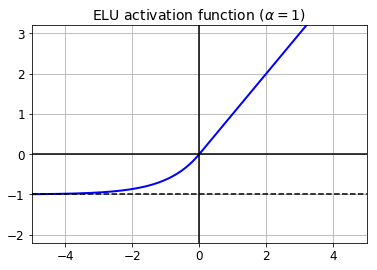

In [15]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [16]:
keras.layers.Dense(10, activation="elu")

In [17]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [18]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

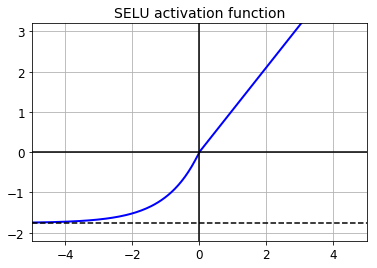

In [19]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [20]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()

    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std, deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std, deviation 1.00
Layer 100: mean 0.02, std, deviation 0.96
Layer 200: mean 0.01, std, deviation 0.90
Layer 300: mean -0.02, std, deviation 0.92
Layer 400: mean 0.05, std, deviation 0.89
Layer 500: mean 0.01, std, deviation 0.93
Layer 600: mean 0.02, std, deviation 0.92
Layer 700: mean -0.02, std, deviation 0.90
Layer 800: mean 0.05, std, deviation 0.83
Layer 900: mean 0.02, std, deviation 1.00


In [21]:
keras.layers.Dense(
    10,
    activation="selu",
    kernel_initializer="lecun_normal"
)

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(1e-3),
    metrics=["accuracy"]
)

In [24]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [25]:
hisory = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 33s 592us/sample - loss: 1.3654 - accuracy: 0.4650 - val_loss: 1.3350 - val_accuracy: 0.4226
Epoch 2/5
55000/55000 [==============================] - 26s 473us/sample - loss: 1.0764 - accuracy: 0.5620 - val_loss: 0.8297 - val_accuracy: 0.6720
Epoch 3/5
55000/55000 [==============================] - 26s 469us/sample - loss: 0.7583 - accuracy: 0.7122 - val_loss: 0.6718 - val_accuracy: 0.7572
Epoch 4/5
55000/55000 [==============================] - 26s 466us/sample - loss: 0.6541 - accuracy: 0.7585 - val_loss: 0.6227 - val_accuracy: 0.7784
Epoch 5/5
55000/55000 [==============================] - 26s 479us/sample - loss: 0.6078 - accuracy: 0.7786 - val_loss: 0.5928 - val_accuracy: 0.7966


In [26]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

hisory = model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 18s 330us/sample - loss: 1.8183 - accuracy: 0.2622 - val_loss: 1.2275 - val_accuracy: 0.4776
Epoch 2/15
55000/55000 [==============================] - 15s 276us/sample - loss: 1.1048 - accuracy: 0.5380 - val_loss: 0.9821 - val_accuracy: 0.5538
Epoch 3/15
55000/55000 [==============================] - 15s 267us/sample - loss: 0.9367 - accuracy: 0.6199 - val_loss: 0.8287 - val_accuracy: 0.6860
Epoch 4/15
55000/55000 [==============================] - 15s 269us/sample - loss: 0.7906 - accuracy: 0.6868 - val_loss: 0.7166 - val_accuracy: 0.7484
Epoch 5/15
55000/55000 [==============================] - 15s 271us/sample - loss: 0.6905 - accuracy: 0.7417 - val_loss: 0.6236 - val_accuracy: 0.7564
Epoch 6/15
55000/55000 [==============================] - 15s 274us/sample - loss: 0.7059 - accuracy: 0.7347 - val_loss: 0.6808 - val_accuracy: 0.7608
Epoch 7/15
55000/55000 [=====================

## Batch Normalization

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_212 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_213 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_214 (Dense)            (None, 10)               

In [29]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [30]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [31]:
bn2 = model.layers[3]
bn2.updates

[<tf.Operation 'cond_2/Identity' type=Identity>,
 <tf.Operation 'cond_3/Identity' type=Identity>]

In [32]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 104us/sample - loss: 0.8767 - accuracy: 0.7137 - val_loss: 0.5532 - val_accuracy: 0.8208
Epoch 2/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.5755 - accuracy: 0.8018 - val_loss: 0.4759 - val_accuracy: 0.8458
Epoch 3/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5154 - accuracy: 0.8212 - val_loss: 0.4395 - val_accuracy: 0.8542
Epoch 4/10
55000/55000 [==============================] - 4s 80us/sample - loss: 0.4842 - accuracy: 0.8312 - val_loss: 0.4161 - val_accuracy: 0.8594
Epoch 5/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4561 - accuracy: 0.8424 - val_loss: 0.4003 - val_accuracy: 0.8644
Epoch 6/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4400 - accuracy: 0.8468 - val_loss: 0.3884 - val_accuracy: 0.8702
Epoch 7/10
55000/55000 [==============================] 

有时候，在激活函数之前使用BN，能够取得更好的结果，这这种情况下，BN前的layer不需要bias，可以通过设置`use_bias=False`

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.8524 - accuracy: 0.7145 - val_loss: 0.5589 - val_accuracy: 0.8098
Epoch 2/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.5754 - accuracy: 0.8017 - val_loss: 0.4820 - val_accuracy: 0.8350
Epoch 3/10
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5157 - accuracy: 0.8220 - val_loss: 0.4454 - val_accuracy: 0.8486
Epoch 4/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4808 - accuracy: 0.8320 - val_loss: 0.4213 - val_accuracy: 0.8522
Epoch 5/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4549 - accuracy: 0.8412 - val_loss: 0.4063 - val_accuracy: 0.8584
Epoch 6/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4374 - accuracy: 0.8475 - val_loss: 0.3951 - val_accuracy: 0.8630
Epoch 7/10
55000/55000 [==============================] -

## Gradient Clipping
对梯度的裁剪，可能让梯度向量改变方向，比如\[0.9, 100\]，如果裁剪到\[-1.0, 1.0\]的范围的结果是\[0.9, 1.0\],这就改变了向量的方向。
如果不想改变方向，可以使用`clipnorm`，它会对整个向量做长度的修改。

In [34]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [35]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Reusing Pretrained Layers
当我们需要训练一个大型的深度网络模型时，如果每次都重新训练，显然是不明智的。我们应该尽可能的找到与该任务相似的已经训练好的网络模型，然后复用底层的隐藏层。
这么做的原理是：神经网络的结果是分层的，低层的隐藏层描述的特征更加简单。
这种复用隐藏层的技术成为**transfer learning**，它有两大优点：
- 极大的提升训练速度
- 可以使用更少的训练数据

举个例子，假如我们已经有了一个把图片分为100类的模型（识别动物，人，车辆等等）。我们新的模型的要求是能够识别机动车，这两个任务就很相似，我们可以复用原模型的多个低隐藏层，如下图所示：

![](https://i.loli.net/2019/10/23/wvHZ41glaGfnCts.png)

可以看出，在复用隐藏层时，可以灵活的固定住某些层，模型在训练过程中，就不会更新这些固定层的梯度。

提示：如果复用模型的输入数据跟新模型不同，需要多写一个处理层，来适配这些数据。

原模型的较高层次的隐藏层，可能对新模型用处不大，因此，就需要我们找到最佳的复用层数。一般原则是，任务越相似，复用的层数就越多。

步骤如下：

1. 先固定住所有的复用层，查看性能
2. 解冻最上层的一个或多个隐藏层，查看性能，训练数据越多，可解冻的隐藏层越多
3. 如果性能还不好，可以移除最上边的隐藏层

### Transfer Learning with Keras
我们现在举一个例子。假如Fashion MNIST数据集中只包含8个类别，不包含sandal和shirt。我们先训练一个模型A对其8个类别进行分类，然后训练模型B，对sandal和shirt做二进制分类，+1表示sandal，其他表示shirt。

首先我们从Fashion MNIST中分离出我们需要的数据。

In [38]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # 5或6的索引
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

In [54]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [55]:
X_train_A.shape

(43986, 28, 28)

In [56]:
X_train_B.shape

(200, 28, 28)

In [57]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [58]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [59]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

hisory = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 4s 85us/sample - loss: 0.5909 - accuracy: 0.8100 - val_loss: 0.3772 - val_accuracy: 0.8712
Epoch 2/20
43986/43986 [==============================] - 3s 75us/sample - loss: 0.3520 - accuracy: 0.8793 - val_loss: 0.3393 - val_accuracy: 0.8782
Epoch 3/20
43986/43986 [==============================] - 3s 73us/sample - loss: 0.3167 - accuracy: 0.8889 - val_loss: 0.3016 - val_accuracy: 0.8961
Epoch 4/20
43986/43986 [==============================] - 3s 74us/sample - loss: 0.2969 - accuracy: 0.8967 - val_loss: 0.2858 - val_accuracy: 0.9031
Epoch 5/20
43986/43986 [==============================] - 3s 73us/sample - loss: 0.2824 - accuracy: 0.9032 - val_loss: 0.2807 - val_accuracy: 0.9063
Epoch 6/20
43986/43986 [==============================] - 3s 75us/sample - loss: 0.2721 - accuracy: 0.9071 - val_loss: 0.2683 - val_accuracy: 0.9103
Epoch 7/20
43986/43986 [==============================] -

In [60]:
model_A.save("my_model_A.h5")

In [61]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

hisory = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 4ms/sample - loss: 0.9545 - accuracy: 0.4600 - val_loss: 0.6655 - val_accuracy: 0.5385
Epoch 2/20
200/200 [==============================] - 0s 355us/sample - loss: 0.5899 - accuracy: 0.6900 - val_loss: 0.4785 - val_accuracy: 0.8519
Epoch 3/20
200/200 [==============================] - 0s 364us/sample - loss: 0.4512 - accuracy: 0.8800 - val_loss: 0.4098 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 373us/sample - loss: 0.3871 - accuracy: 0.9100 - val_loss: 0.3666 - val_accuracy: 0.9128
Epoch 5/20
200/200 [==============================] - 0s 366us/sample - loss: 0.3438 - accuracy: 0.9250 - val_loss: 0.3315 - val_accuracy: 0.9300
Epoch 6/20
200/200 [==============================] - 0s 366us/sample - loss: 0.3095 - accuracy: 0.9300 - val_loss: 0.3034 - val_accuracy: 0.9402
Epoch 7/20
200/200 [==============================] - 0s 413us/sample - loss: 0.

In [62]:
model_B.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_237 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_238 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_239 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_240 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_241 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_242 (Dense)            (None, 1)               

In [63]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [64]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [65]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

In [66]:
hisory = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

hisory = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 1s 3ms/sample - loss: 0.5807 - accuracy: 0.6550 - val_loss: 0.5813 - val_accuracy: 0.6450
Epoch 2/4
200/200 [==============================] - 0s 333us/sample - loss: 0.5425 - accuracy: 0.7050 - val_loss: 0.5468 - val_accuracy: 0.6815
Epoch 3/4
200/200 [==============================] - 0s 337us/sample - loss: 0.5086 - accuracy: 0.7200 - val_loss: 0.5164 - val_accuracy: 0.7140
Epoch 4/4
200/200 [==============================] - 0s 376us/sample - loss: 0.4784 - accuracy: 0.7600 - val_loss: 0.4870 - val_accuracy: 0.7292
Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 2s 8ms/sample - loss: 0.3964 - accuracy: 0.8200 - val_loss: 0.3384 - val_accuracy: 0.8722
Epoch 2/16
200/200 [==============================] - 0s 398us/sample - loss: 0.2752 - accuracy: 0.9300 - val_loss: 0.2612 - val_accuracy: 0.9260
Epoch 3/16
200/200 [====================

In [67]:
model_B.evaluate(X_test_B, y_test_B)

[0.1444666212797165, 0.9695]

In [68]:
model_B_on_A.evaluate(X_test_B, y_test_B)

[0.06899205100536346, 0.9925]

In [69]:
(100 - 96.95) / (100 - 99.25)

4.066666666666663

### Unsupervised Pretraining
适用于当任务很复杂，标记的训练数据很少的情况。如下图所示：

![](https://i.loli.net/2019/10/23/OYXRZKMGf5sDmui.png)

无监督预训练首先使用未标记的数据一层一层的训练隐藏层，最后再使用标记数据做监督训练。

==这是但标记数据很少的情况下的一个方法。==

### Pretraining on an Auxiliary Task
这同样是在只有少量标记数据的情况下的解决方案，它的核心思想是首先训练与当前任务相关的模型，然后复用模型的lower隐藏层。

举个例子，比如想训练一个人脸识别模型，但是没有足够的数，很难收集到非常多的某个人的一组脸部照片，但是，我们可以在网上收集到很多照片，然后利用这些照片训练一个识别两个照片是否是同一个人，这么一个模型，然后复用模型的lower隐藏层。

## Faster Optimizers
如果训练一个大型的深度网络模型，可能会非常慢。到目前为止， 我们已经学习了4种提升速度的方法：

- 使用更好的weights
- 使用更好的激活函数
- 使用BN
- 复用lower隐藏层

本小节将引入另外一个可以显著提升速度的方法，**使用更快的optimizer**

### Momentum Optimization
想象一个小球在一个巨大的碗的边缘自由下落，小球一开始很慢，但随着时间的推移，速度越来越快，直到达到一个极限速度（空摩擦力或空气阻力）。小球速度之所以能越来越来，就是因为它在运动的过程中，获得了动量。

普通的梯度下降算法，每次迭代都使用同样的step，因此，遇到斜率很小的代价函数，到达极值的时间就会很长。

梯度下降的公式是：

$${\bf {\theta}} \leftarrow {\bf {\theta}} - \eta \nabla_{\theta}J({\bf {\theta}})$$

从上边的公式就可以看出，如果梯度变得很小，学习就会非常慢。

Momentum算法的公式：

$$
\begin{equation}
1. \quad {\bf {m}} \leftarrow \beta {\bf {m}} - \eta \nabla_{\theta}J({\bf {\theta}}) \\
2. \quad {\bf {\theta}} \leftarrow {\bf {\theta}} + {\bf {m}} 
\end{equation}
$$

Momentum算法的核心是：累计动量。那么动量是如何累计的呢？

假设上边的公式中的向量m初始值为0，那么随着迭代的进行，它的值会逐渐累计，并指向学习的方向。但是它并不会一直增大下去。

很容易验证，它的极限为$gradient \times \eta \times \frac{1}{1-\beta}$,也就是说，如果$\beta=0.9$的话，那么最大的m是10倍的梯度乘以学习率。

如果没用使用Batch Normalization技术标准化每一层的输入，那么每一层的scale很可能不一样，这就会造成不同方向的学习速度的不一样，有的速度很快，有的速度比较慢。

提示：Momentum算法可能会越过极值点，然后再荡回来，这就是设置$\beta$的原因。

In [70]:
optimizer = keras.optimizers.SGD(lr=1e-3, momentum=0.9)